<a href="https://colab.research.google.com/github/rajucherry03/IBM_SKILLSBUILD/blob/main/Sentiment_Analysis_of_Restaurant_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# @title Reading dataset
df=pd.read_csv('/content/drive/MyDrive/Restaurant_Reviews.tsv',delimiter='\t',quoting=3)

In [ ]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Liked'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['Liked'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_2, *['Review'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_3, *['Liked', 'Review'], **{'inner': 'stick'})
chart

In [ ]:
df.shape

(1000, 2)

In [ ]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [ ]:
df.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [ ]:
# @title Data Preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# @title Data Cleaning
corpus = []
for i in range(0, 1000):
    review = re.sub(pattern='[^a-zA-Z]',repl=' ',string=df['Review'][i])
    review = review.lower()
    review_words=review.split()
    review_words=[word for word in review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [ ]:
# @title  Assigning Dependent and Independent varibles
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

In [ ]:
# @title Data spliting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

In [ ]:
# @title Traing the module
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [ ]:
# @title Predicting Metric values
from sklearn.metrics import accuracy_score,precision_score,recall_score
print("Accuracy score  is  ",accuracy_score(y_test,y_pred))
print("Precision score is  is ",precision_score(y_test,y_pred))
print("Recall score  is ",recall_score(y_test,y_pred))

Accuracy score  is   0.765
Precision score is  is  0.7641509433962265
Recall score  is  0.7864077669902912


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[72 25]
 [22 81]]


Text(95.72222222222221, 0.5, 'Actual values')

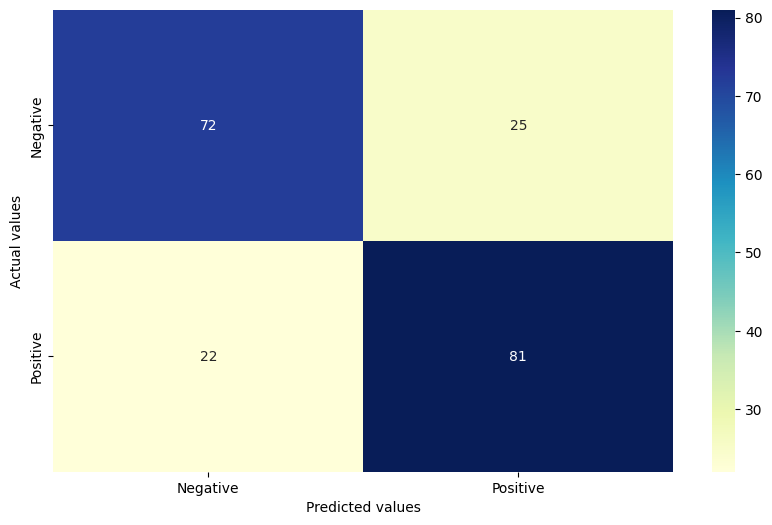

In [ ]:
# @title confusion matrix plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap='YlGnBu',xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [ ]:
# @title Finding Best Accuracy
from scipy.stats import multinomial
bs=0.0
alpha_value=0.0
for i in np.arange(0.1,1.1,0.1):
  tc=MultinomialNB(alpha=i)
  tc.fit(X_train,y_train)
  temp_y_pred = tc.predict(X_test)
  score=accuracy_score(y_test,temp_y_pred)
  print ("Accuracy score is :",score)
  if score>bs:
    bs=score
    alpha_value=1
print("--------------------------------------------------")
print('The best accuracy is {}% with alpha value as {}'.format(round(bs*100,2),round(alpha_value,1)))

Accuracy score is : 0.78
Accuracy score is : 0.785
Accuracy score is : 0.78
Accuracy score is : 0.78
Accuracy score is : 0.775
Accuracy score is : 0.775
Accuracy score is : 0.775
Accuracy score is : 0.77
Accuracy score is : 0.765
Accuracy score is : 0.765
--------------------------------------------------
The best accuracy is 78.5% with alpha value as 1


In [ ]:
clf1 = MultinomialNB(alpha=0.2)
clf1.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

In [ ]:
# @title User defined function for predicting sample reviews
def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ',string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words=sample_review.split()
    sample_review_words=[word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)
    temp=cv.transform([final_review]).toarray()
    return clf1.predict(temp)


In [ ]:
# @title predicting the positive/Negative Reviews
sample_review="The food is really good."
if predict_sentiment(sample_review):
  print("This is a Positive Review")
else:
  print("This is a Negative Review")

This is a Positive Review


In [ ]:
sample_review="The food is really bad."
if predict_sentiment(sample_review):
  print("This is a Positive Review")
else:
  print("This is a Negative Review")

This is a Negative Review
